<div style="text-align: right">AI workshop at Northeastern with EM Lyon Business School</div>
<div style="text-align: right">Zixiao Wang , 24 November 2019,</div>

# Notebook Draft

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import tensorflow as tf
%matplotlib inline

## Load Stock Data

In [40]:
dataset = pd.read_csv("https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&outputsize=full&symbol=AAPL&interval=1min&apikey=G6JDX3PTNITW8EW1&datatype=csv")

In [41]:
dataset.head(10)

,timestamp,open,high,low,close,volume
0,2019-11-29 13:01:00,267.2500,267.2500,267.2500,267.2500,1789986
1,2019-11-29 13:00:00,267.5200,267.8700,266.9700,267.1800,580329
2,2019-11-29 12:59:00,267.4600,267.5700,267.4000,267.5200,117607
3,2019-11-29 12:58:00,267.4200,267.5500,267.4195,267.4693,75179
4,2019-11-29 12:57:00,267.5500,267.5563,267.4100,267.4278,77175
5,2019-11-29 12:56:00,267.5100,267.6100,267.4900,267.5400,61501
6,2019-11-29 12:55:00,267.5286,267.5800,267.4100,267.5100,124269
7,2019-11-29 12:54:00,267.6400,267.6800,267.4400,267.5200,90808
8,2019-11-29 12:53:00,267.6500,267.6800,267.5830,267.6220,42244
9,2019-11-29 12:52:00,267.6750,267.6850,267.6400,267.6500,30338


In [42]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746 entries, 0 to 1745
Data columns (total 6 columns):
timestamp    1746 non-null object
open         1746 non-null float64
high         1746 non-null float64
low          1746 non-null float64
close        1746 non-null float64
volume       1746 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 82.0+ KB


In [43]:
used_dataset = dataset.iloc[:,[1,2,3,4]]
# dataset["timestamp","close"]
used_dataset.head(10)

,open,high,low,close
0,267.2500,267.2500,267.2500,267.2500
1,267.5200,267.8700,266.9700,267.1800
2,267.4600,267.5700,267.4000,267.5200
3,267.4200,267.5500,267.4195,267.4693
4,267.5500,267.5563,267.4100,267.4278
5,267.5100,267.6100,267.4900,267.5400
6,267.5286,267.5800,267.4100,267.5100
7,267.6400,267.6800,267.4400,267.5200
8,267.6500,267.6800,267.5830,267.6220
9,267.6750,267.6850,267.6400,267.6500


In [44]:
used_dataset.tail(10)

,open,high,low,close
1736,262.7200,262.7200,262.6800,262.6800
1737,262.5244,262.6400,262.5244,262.6400
1738,262.9801,263.0300,262.4791,262.4791
1739,262.8900,262.9909,262.8900,262.9909
1740,263.0559,263.0559,262.8800,262.8800
1741,262.7200,263.0317,262.7200,263.0317
1742,262.7899,262.7899,262.7899,262.7899
1743,262.4300,262.5300,262.2600,262.4890
1744,262.4451,262.7066,262.3263,262.4251
1745,262.4300,262.4300,262.4300,262.4300


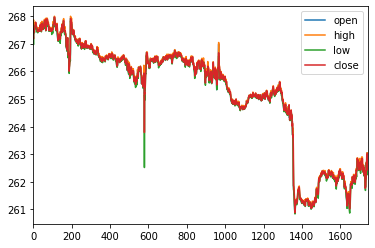

In [45]:
used_dataset.plot()
# plt.plot_date(time_close.iloc[:,[0]],time_close.iloc[:,[1]], '-')

## Deep Learning Model

### Import libraries

In [46]:
import numpy as np
import pandas as pd

Set random seed (This will give us same result each time)

In [47]:
import random
random.seed(42)

### Calculate stock data indicators

* The difference between the highest price and the lowest price
* The difference between the opening price and the closing price
* 3-day moving average
* 10-day moving average
* 30-day moving average
* Average variance within 5 days

In [48]:
used_dataset['H-L'] = used_dataset['high'] - used_dataset['low']
used_dataset['O-C'] = used_dataset['close'] - used_dataset['open']
used_dataset['3day MA'] = used_dataset['close'].shift(1).rolling(window = 3).mean()
used_dataset['10day MA'] = used_dataset['close'].shift(1).rolling(window = 10).mean()
used_dataset['30day MA'] = used_dataset['close'].shift(1).rolling(window = 30).mean()
used_dataset['Std_dev']= used_dataset['close'].rolling(5).std()


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
used_dataset.head(100)

,open,high,low,close,H-L,O-C,3day MA,10day MA,30day MA,Std_dev
0,267.2500,267.2500,267.2500,267.2500,0.0000,0.0000,NaN,NaN,NaN,NaN
1,267.5200,267.8700,266.9700,267.1800,0.9000,-0.3400,NaN,NaN,NaN,NaN
2,267.4600,267.5700,267.4000,267.5200,0.1700,0.0600,NaN,NaN,NaN,NaN
3,267.4200,267.5500,267.4195,267.4693,0.1305,0.0493,267.316667,NaN,NaN,NaN
4,267.5500,267.5563,267.4100,267.4278,0.1463,-0.1222,267.389767,NaN,NaN,0.146799
...,...,...,...,...,...,...,...,...,...,...
95,267.5250,267.5500,267.4800,267.5300,0.0700,0.0050,267.521867,267.51744,267.652290,0.040663
96,267.4753,267.5340,267.3400,267.5340,0.1940,0.0587,267.517167,267.51944,267.653763,0.029278
97,267.5344,267.5800,267.4687,267.4687,0.1113,-0.0657,267.513000,267.51634,267.644897,0.036178
98,267.4950,267.5940,267.4500,267.5300,0.1440,0.0350,267.510900,267.50780,267.630520,0.032697


In [50]:
used_dataset['Price_Rise'] = np.where(used_dataset['close'].shift(-1) > used_dataset['close'], used_dataset['close'].shift(-1)-used_dataset['close'], used_dataset['close'].shift(-1)-used_dataset['close'])

Drop all NaN

In [51]:
used_dataset = used_dataset.dropna()

In [52]:
used_dataset

,open,high,low,close,H-L,O-C,3day MA,10day MA,30day MA,Std_dev,Price_Rise
30,267.4700,267.5850,267.4600,267.5000,0.1250,0.0300,267.513667,267.49193,267.539873,0.011145,-0.0300
31,267.5000,267.5400,267.4600,267.4700,0.0800,-0.0300,267.507000,267.49225,267.548207,0.020717,0.0400
32,267.4600,267.5446,267.4600,267.5100,0.0846,0.0500,267.497000,267.49325,267.557873,0.018979,-0.0500
33,267.5799,267.5799,267.4600,267.4600,0.1199,-0.1199,267.493333,267.49725,267.557540,0.026157,0.1000
34,267.6400,267.6500,267.5000,267.5600,0.1500,-0.0800,267.480000,267.49460,267.557230,0.039370,0.1000
...,...,...,...,...,...,...,...,...,...,...,...
1740,263.0559,263.0559,262.8800,262.8800,0.1759,-0.1759,262.703333,262.27000,262.431463,0.202509,0.1517
1741,262.7200,263.0317,262.7200,263.0317,0.3117,0.3117,262.783333,262.38100,262.436797,0.237176,-0.2418
1742,262.7899,262.7899,262.7899,262.7899,0.0000,0.0000,262.967533,262.50417,262.445187,0.220067,-0.3009
1743,262.4300,262.5300,262.2600,262.4890,0.2700,0.0590,262.900533,262.60316,262.443350,0.216080,-0.0639


### Define the input and output

X is the inputs. The data indicators we calculated before. 

y is output. In here is the rise of stock price.

In [53]:
X = used_dataset.iloc[:, 4:-1]
y = used_dataset.iloc[:, -1]

### Split dataset we used

Part of dataset wiil be used in training(80%). Others will be used in testing(20%).

The model uses the training data set to obtain weights, and the test data set to see how well the model performs on new data

In [54]:
split = int(len(used_dataset)*0.8)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

### Feature scaling

Another important step in preprocessing the data is to normalize the data set. This step will average all input features to 0 and convert their variance to 1. This can ensure that the model will not be biased due to different input features when training the model. If this step is not handled properly, the model may be confused and give higher weight to those input features with higher averages.

In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Build the Deep network

You will need tensorflow library in your environment first

In [56]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [57]:
DLmodel = Sequential()

In [58]:
DLmodel.add(
    Dense(
        units = 128, 
        kernel_initializer = 'uniform',
        activation = 'relu',
        input_dim = X.shape[1]))

* Units: It defines the number of nodes or neurons in a layer. We set the value here to 128, which means that there will be 128 neurons in our hidden layer.
* Kernel_initializer: It defines the starting values of different neuron weights in the hidden layer. We define it here as "uniform", which means that the weight is initialized with evenly distributed values.
* Activation: It is the activation function of neurons in the hidden layer. Here we define the activation function as a modified linear unit function.
* Input_dim: It defines the number of inputs to the hidden layer. We define the value of the number of inputs as equal to the number of columns in the input feature data frame. However, this argument is no longer needed in subsequent layers because the model knows how much output was generated in the previous layer.

In [59]:
DLmodel.add(
    Dense(
        units = 128,
        kernel_initializer = 'uniform',
        activation = 'relu'))

Add a hidden layer

In [60]:
# DLmodel.add(
#     Dense(
#         units = 1, 
#         kernel_initializer = 'uniform',
#         activation = 'sigmoid'))
DLmodel.add(
    Dense(
        units = 1, 
        kernel_initializer = 'uniform',
        activation = 'relu'))

Add an output layer

In [61]:
DLmodel.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

Finally, the following arguments are passed to compile the DLmodel: 

* Optimizer: Choose optimizer as "Adam", which is an extended form of the stochastic gradient descent algorithm.

* Loss: It will define the loss that needs to be optimized during the training process. We define loss as the mean square error.

* Metrics: It defines a matrix that the model evaluates during training and testing. We choose an evaluation matrix whose accuracy is the model.

### Train the network

In [62]:
DLmodel.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
1372/1372 [==============================] - 0s 207us/step - loss: 0.0103 - accuracy: 0.0299
Epoch 2/100
1372/1372 [==============================] - 0s 92us/step - loss: 0.0104 - accuracy: 0.0299
Epoch 3/100
1372/1372 [==============================] - 0s 129us/step - loss: 0.0099 - accuracy: 0.0299
Epoch 4/100
1372/1372 [==============================] - 0s 107us/step - loss: 0.0101 - accuracy: 0.0299
Epoch 5/100
1372/1372 [==============================] - 0s 86us/step - loss: 0.0097 - accuracy: 0.0299
Epoch 6/100
1372/1372 [==============================] - 0s 95us/step - loss: 0.0094 - accuracy: 0.0299
Epoch 7/100
1372/1372 [==============================] - 0s 87us/step - loss: 0.0096 - accuracy: 0.0299
Epoch 8/100
1372/1372 [==============================] - 0s 89us/step - loss: 0.0095 - accuracy: 0.0299
Epoch 9/100
1372/1372 [==============================] - 0s 90us/step - loss: 0.0093 - accuracy: 0.0299
Epoch 10/100
1372/1372 [==============================] - 0s 

1372/1372 [==============================] - 0s 96us/step - loss: 0.0092 - accuracy: 0.0299
Epoch 76/100
1372/1372 [==============================] - 0s 94us/step - loss: 0.0092 - accuracy: 0.0299 0s - loss: 0.0048 - accuracy: 0.
Epoch 77/100
1372/1372 [==============================] - 0s 101us/step - loss: 0.0094 - accuracy: 0.0299
Epoch 78/100
1372/1372 [==============================] - 0s 93us/step - loss: 0.0093 - accuracy: 0.0299
Epoch 79/100
1372/1372 [==============================] - 0s 92us/step - loss: 0.0099 - accuracy: 0.0299
Epoch 80/100
1372/1372 [==============================] - 0s 92us/step - loss: 0.0095 - accuracy: 0.0299
Epoch 81/100
1372/1372 [==============================] - 0s 99us/step - loss: 0.0093 - accuracy: 0.0299ETA: 0s - loss: 0.0082 - accuracy: 0.0255
Epoch 82/100
1372/1372 [==============================] - 0s 95us/step - loss: 0.0093 - accuracy: 0.0299
Epoch 83/100
1372/1372 [==============================] - 0s 96us/step - loss: 0.0094 - accuracy: 

### Make Prediction

In [64]:
y_pred = DLmodel.predict(X_test)


In [69]:
(y_pred,y_test.tolist())

(array([[0.        ],
        [0.        ],
        [0.03503238],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.03265832],
        [0.0130416 ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.16598272],
        [0.039645  ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.00936826],
        [0.03292422],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.05510638],
        [0.        ],
        [0.09798228],
        [0.018346  ],
        [0.        ],
        [0.        ],
        [0.10331994],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0

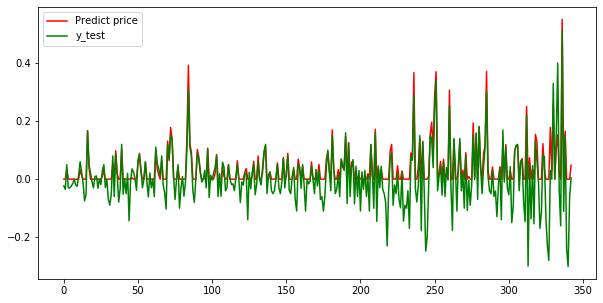

In [70]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(y_pred, color='r', label='Predict price')
plt.plot(y_test.tolist(), color='g', label='y_test')
plt.legend()
plt.show()